In [1]:
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy import interpolate
from models import *
from IPython import display

/data/beegfs/astro-storage/groups/henning/schwarz/wedgeford/models/make_plots.py:19: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  rc('mathtext', **{'fontset':'custom', 'sf':'stixsans','default':'sf','fallback_to_cm':'True'})
/data/beegfs/astro-storage/groups/henning/schwarz/wedgeford/models/make_plots.py:19: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  rc('mathtext', **{'fontset':'custom', 'sf':'stixsans','default':'sf','fallback_to_cm':'True'})
/data/beegfs/astro-storage/groups/henning/schwarz/wedgeford/models/make_plots.py:19: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  rc('mathtext', **{'fontset':'custom', 'sf':'stixsans','def

In [ ]:
# %load scripts/do_RT_thermal.py
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy import interpolate
import sys
#sys.path.append('../')
from models import *





stellar_params: {'Ms': 1, 'Rs': 2.0, 'Ts': 5000, 'accrate': 1e-07, 'f': 0.01}
disk_params: {'Mdisk': 0.01, 'Mfrac': [0.01, 0.01], 'R0': [5, 5], 'Rout': [100, 50], 'H0': [1, 0.3], 'p': [-1, -1], 'fi': [0.25, 0.25], 'Rdisk': [125, 125]}
envelope_params: {'Min': 1e-06, 'Rc': 125, 'rho_amb': 1e-25, 'rho_0': 3e-22, 'theta_min': 25, 'exf': 0.25, 'Rmax': 15000.0, 'd2g': 0.01, 'shock': False}
grid_params: {'N': [180, 90, 48], 'min': [0.1, 0.19634954084936207, 0], 'max': [400, 1.5707963267948966, 6.283185307179586], 'spacing': ['log', 'lin', 'lin']}
dust_params: {'rho_si': 3.1518, 'amin_chem': 0.06, 'amax_ism': 1.0, 'amin': [0.005, 0.005], 'amax': [1, 1000.0], 'apow': [3.5, 3.5]}
RT_params: {'cr_model': 'ssx', 'zetacr': 1.3e-17, 'G0': 1, 'viscous_heating': False, 'fLya': 0.0001}
directory exists - will overwrite current model if you write to it!
Reading wavelength_micron.inp
Writing wavelength_micron.inp
Reading wavelength_micron.inp
Writing stars.inp
Reading amr_grid.inp
Reading wavelength_mic

/home/schwarz/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/schwarz/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Reading wavelength_micron.inp
Reading wavelength_micron.inp
Writing mcmono_wavelength_micron.inp
Reading wavelength_micron.inp


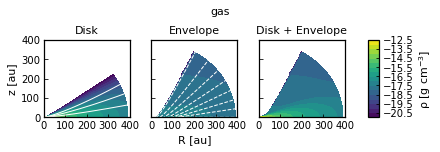

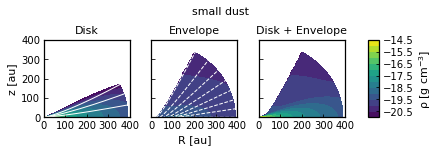

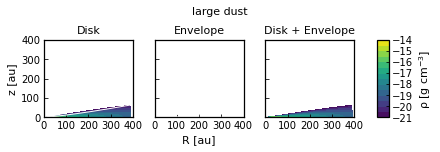

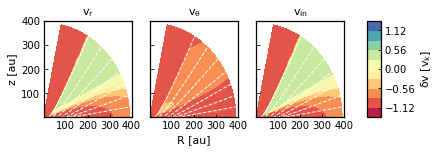

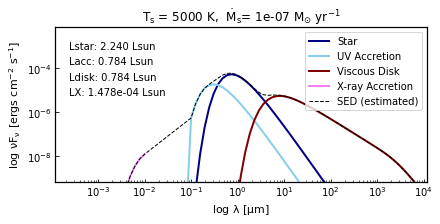

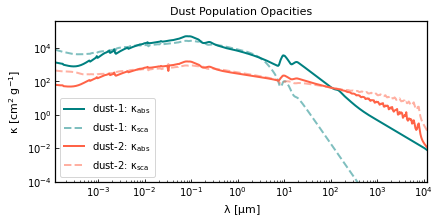

In [20]:
p0 = 'default'
outdir = '/out/mk/'
pdef = new_model(p0)
pdef['Mdisk'] = 0.01
m0 = initialize_model(pdef,outdir=outdir)
save_setup_fig(m0)


In [19]:
m0.m.print_params()

stellar_params: {'Ms': 1, 'Rs': 2.0, 'Ts': 5000, 'accrate': 1e-07, 'f': 0.01}
disk_params: {'Mdisk': 0.06, 'Mfrac': [0.01, 0.01], 'R0': [5, 5], 'Rout': [100, 50], 'H0': [1, 0.3], 'p': [-1, -1], 'fi': [0.25, 0.25], 'Rdisk': [125, 125], 'alpha': 0.0002846225776978862}
envelope_params: {'Min': 1e-06, 'Rc': 125, 'rho_amb': 1e-25, 'rho_0': 3e-22, 'theta_min': 25, 'exf': 0.25, 'Rmax': 15000.0, 'd2g': 0.01, 'shock': False}
grid_params: {'N': [180, 90, 48], 'min': [0.1, 0.19634954084936207, 0], 'max': [400, 1.5707963267948966, 6.283185307179586], 'spacing': ['log', 'lin', 'lin']}
dust_params: {'rho_si': 3.1518, 'amin_chem': 0.06, 'amax_ism': 1.0, 'amin': [0.005, 0.005], 'amax': [1, 1000.0], 'apow': [3.5, 3.5]}
RT_params: {'cr_model': 'ssx', 'zetacr': 1.3e-17, 'G0': 1, 'viscous_heating': False, 'fLya': 0.0001}


Reading wavelength_micron.inp
Writing wavelength_micron.inp
Reading wavelength_micron.inp
Writing stars.inp
Accretion rate from infall: 1.0592505319950353e-08 Msun/yr
Reading wavelength_micron.inp
Reading wavelength_micron.inp
Writing mcmono_wavelength_micron.inp
Reading wavelength_micron.inp
Reading wavelength_micron.inp
Reading wavelength_micron.inp
Reading amr_grid.inp
ready to do thermal montecarlo!
thermal monte carlo done!
Reading dust_density.inp
Reading dust_temperature.dat


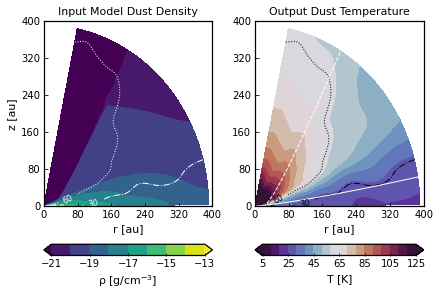

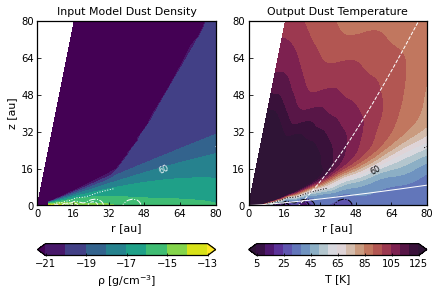

In [21]:
prep_thermal_transfer(m0,nphot=100000)
print('ready to do thermal montecarlo!')

do_thermal_transfer(m0,nt=8)
print('thermal monte carlo done!')

save_dustRT(m0)

ready to do high energy radiation montecarlo!
high energy monte carlo done!


/home/schwarz/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/schwarz/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


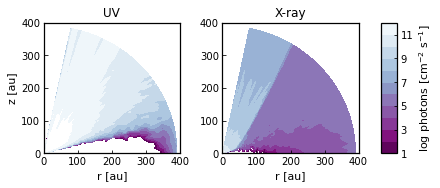

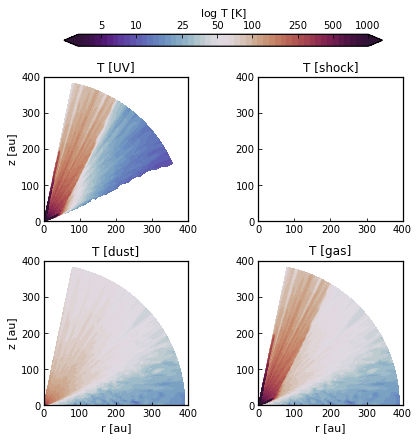

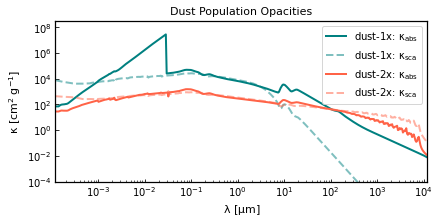

In [17]:
# %load scripts/do_RT_he.py
#outdir = './out/m1_test/'
#m0 = load_model(outdir)

prep_he_transfer(m0)
print('ready to do high energy radiation montecarlo!')

do_he_transfer(m0,nt=8)
print('high energy monte carlo done!')

save_heRT(m0)